In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()


In [1]:
!bash prepare.sh

--2021-03-02 16:44:26--  http://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1563015 (1.5M) [application/x-httpd-php]
Saving to: ‘HTRU2.zip’

100%[======================================>] 1,563,015    533KB/s   in 2.9s   

2021-03-02 16:44:30 (533 KB/s) - ‘HTRU2.zip’ saved [1563015/1563015]

Archive:  HTRU2.zip
  inflating: HTRU_2.csv              
  inflating: HTRU_2.arff             
  inflating: Readme.txt              


## Load Data

In [17]:
data = pd.read_csv('HTRU_2.csv', na_values=['?'], names=['profile_mean','profile_std','profile_kurt','profile_skew','dmsnr_mean','dmsnr_std', 'dmsnr_kurt','dmsnr_skew', 'class']).iloc[:, :]
data.head()

,profile_mean,profile_std,profile_kurt,profile_skew,dmsnr_mean,dmsnr_std,dmsnr_kurt,dmsnr_skew,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


array([[<AxesSubplot:title={'center':'profile_mean'}>,
        <AxesSubplot:title={'center':'profile_std'}>,
        <AxesSubplot:title={'center':'profile_kurt'}>],
       [<AxesSubplot:title={'center':'profile_skew'}>,
        <AxesSubplot:title={'center':'dmsnr_mean'}>,
        <AxesSubplot:title={'center':'dmsnr_std'}>],
       [<AxesSubplot:title={'center':'dmsnr_kurt'}>,
        <AxesSubplot:title={'center':'dmsnr_skew'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

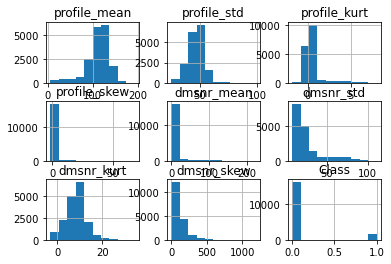

In [14]:
data.hist()

In [18]:
data.head(1).T

,0
profile_mean,140.562500
profile_std,55.683782
profile_kurt,-0.234571
profile_skew,-0.699648
dmsnr_mean,3.199833
dmsnr_std,19.110426
dmsnr_kurt,7.975532
dmsnr_skew,74.242225
class,0.000000


## Drop Highly Missing Values

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   profile_mean  17898 non-null  float64
 1   profile_std   17898 non-null  float64
 2   profile_kurt  17898 non-null  float64
 3   profile_skew  17898 non-null  float64
 4   dmsnr_mean    17898 non-null  float64
 5   dmsnr_std     17898 non-null  float64
 6   dmsnr_kurt    17898 non-null  float64
 7   dmsnr_skew    17898 non-null  float64
 8   class         17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


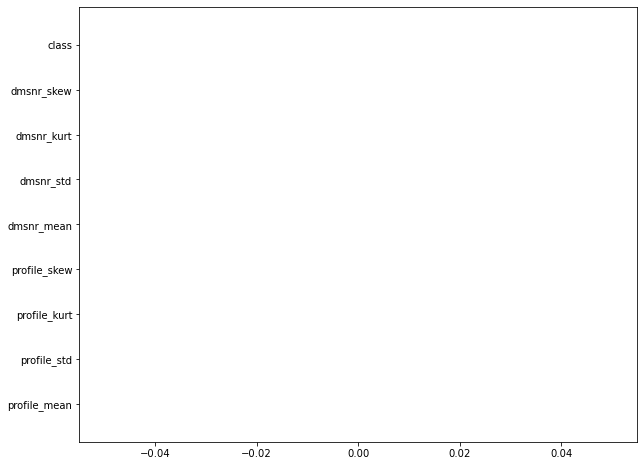

In [20]:
plt.figure(figsize=(10,8))
missing = pd.DataFrame({'column':data.columns ,'na_percent':data.isnull().sum()/len(data)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

# Preprocess Data

In [22]:
data.describe()

,profile_mean,profile_std,profile_kurt,profile_skew,dmsnr_mean,dmsnr_std,dmsnr_kurt,dmsnr_skew,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


array([[<AxesSubplot:title={'center':'profile_mean'}>,
        <AxesSubplot:title={'center':'profile_std'}>,
        <AxesSubplot:title={'center':'profile_kurt'}>],
       [<AxesSubplot:title={'center':'profile_skew'}>,
        <AxesSubplot:title={'center':'dmsnr_mean'}>,
        <AxesSubplot:title={'center':'dmsnr_std'}>],
       [<AxesSubplot:title={'center':'dmsnr_kurt'}>,
        <AxesSubplot:title={'center':'dmsnr_skew'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

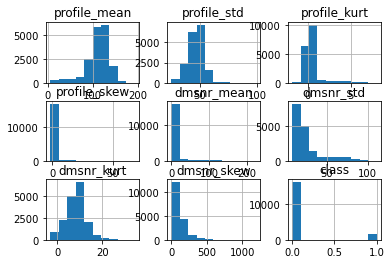

In [23]:
data.hist()

In [26]:
data['class'].value_counts()

0    16259
1     1639
Name: class, dtype: int64

In [27]:
data.head()

,profile_mean,profile_std,profile_kurt,profile_skew,dmsnr_mean,dmsnr_std,dmsnr_kurt,dmsnr_skew,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Add distance Feture

In [28]:
data.to_csv('data_processed.csv', index=False)